# About Data
Source :  UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. 

##### The objective is to predict who will respond to an offer for a product or service
##### The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

## Columns

### Client data:
1 - age: (numeric)

2 - job: type of job - categorical

3 - marital: marital status - categorical

4 - education: categorical

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Average yearly balance, in euros (numeric)

### Related with thhe last contact of the current campaign:¶
8 - contact: contact communication type - categorical

9 - month: last contact month of year - categorical

10 - day: last contact day of the week - categorical

11 - duration: last contact duration, in seconds (numeric). 

###Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

### Other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, 1-44)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  
 ### Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


# What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

In [193]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [194]:
# Upload the whole dataset
pd.set_option('display.max_columns', None)
bank = pd.read_csv('data/bank-full.csv', sep=';')
bank.head()
# cruzar com outro df para obter balance?
# day of week no additional

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [195]:
# Explore size
print(bank.columns)
print(bank.shape)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
(45211, 17)


In [196]:
# np.sort(bank.pdays.unique())
# 999 seria interpretável como mais de um mês atrás.

In [197]:
# consumer price index - monthly indicator
# bank['cons.price.idx'].unique()

# Data Cleaning

### Remove Noise: 
Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.

In [198]:
# Checking for null values
bank.isna().sum()
# clean!

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [199]:
# More info about data to ensure that the expected column type matches 
# so that we can handle null values that are obscured from .isna()
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Analyzing durations

<function matplotlib.pyplot.show(*args, **kw)>

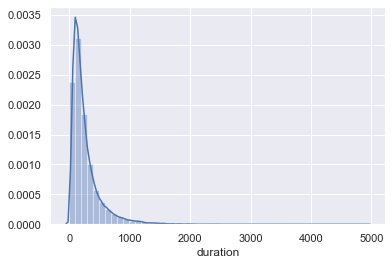

In [200]:
# Distribuion
sns.set()
sns.distplot(bank['duration'], bins = 50)
plt.show

In [201]:
### Dropping rows  with less than 10 seconds in duration
bank = bank.where(bank['duration'] > 20)
bank = bank.dropna()
bank.shape

(43942, 17)

In [203]:
bank.duration.unique()

array([ 261.,  151.,   76., ..., 1298., 1246., 1556.])

In [204]:
# Change the unit of 'duration' from seconds to minutes
bank['duration'] = bank['duration'].apply(lambda n:n/60).round(2)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,4.35,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,2.52,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,1.27,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,1.53,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,3.30,1.0,-1.0,0.0,unknown,no


In [205]:
bank.duration.unique()

array([ 4.35,  2.52,  1.27, ..., 21.63, 20.77, 25.93])

### Delete rows which 'poutcome' contains 'other'

In [206]:
# Previous responses to last campaigns
np.sort(bank.poutcome.unique())

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [207]:
condition = bank['poutcome'] == 'other'
bank = bank.drop(bank[condition].index, axis = 0, inplace = False)
bank.shape

(42225, 17)

### Removing outliers from column 'Balance' and pdays

In [208]:
bank[['balance']].mean()
# Cria coluna pra analisar outliers 
bank['balance_outliers'] = bank['balance']
# Compute the z score of each value in the sample, relative to the sample mean and standard deviation.
bank['balance_outliers']= zscore(bank['balance_outliers'])
bank.head()
# drop z score > 3 
# because Outliers are defined as the values which are more than three standard deviations away from the mean.
condition1 = (bank['balance_outliers'] > 3) | (bank['balance_outliers'] < -3 )
bank = bank.drop(bank[condition1].index, axis = 0, inplace = False)
# bank.shape

In [209]:
# Drop column Balance outliers
bank = bank.drop(['balance_outliers'], axis=1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,4.35,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,2.52,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,1.27,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,1.53,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,3.30,1.0,-1.0,0.0,unknown,no


<function matplotlib.pyplot.show(*args, **kw)>

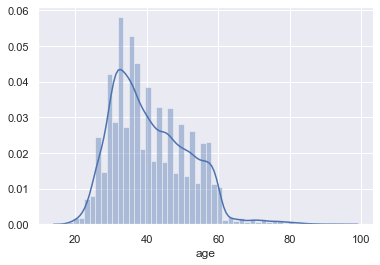

In [210]:
sns.set()
sns.distplot(bank['age'])
plt.show

### Binary Output Variable: 
Logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.

In [211]:
# Assumption 1 = Binary Output Variable:
# Convert column y into binary [0,1]
bank['response'] = bank['y'].map({'yes': 1, 'no': 0})
bank.head()
bank.response.unique()

array([0, 1], dtype=int64)

In [212]:
# bank.to_csv('data/bank_clean.csv')

### Transform categorical varibales into vectors or indicators
- Get dummies: Convert categorical variable into dummy/indicator variables
- One hot encoding: transform the variable into a binary vector where only one element is non-zero, or hot. With one-hot encoding, a categorical feature becomes an array whose size is the number of possible choices for that features

###  1. Get dummies

In [213]:
# Get dummies:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome']

dummies = pd.get_dummies(bank, prefix='d_', columns=categorical)
print(dummies.shape)
print(bank.shape)
dummies.head(10)

(41529, 52)
(41529, 18)


,age,balance,day,duration,campaign,pdays,previous,y,response,d__admin.,d__blue-collar,d__entrepreneur,d__housemaid,d__management,d__retired,d__self-employed,d__services,d__student,d__technician,d__unemployed,d__unknown,d__divorced,d__married,d__single,d__primary,d__secondary,d__tertiary,d__unknown,d__no,d__yes,d__no,d__yes,d__no,d__yes,d__cellular,d__telephone,d__unknown,d__apr,d__aug,d__dec,d__feb,d__jan,d__jul,d__jun,d__mar,d__may,d__nov,d__oct,d__sep,d__failure,d__success,d__unknown
0,58.0,2143.0,5.0,4.35,1.0,-1.0,0.0,no,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44.0,29.0,5.0,2.52,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33.0,2.0,5.0,1.27,1.0,-1.0,0.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47.0,1506.0,5.0,1.53,1.0,-1.0,0.0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33.0,1.0,5.0,3.30,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5,35.0,231.0,5.0,2.32,1.0,-1.0,0.0,no,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6,28.0,447.0,5.0,3.62,1.0,-1.0,0.0,no,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7,42.0,2.0,5.0,6.33,1.0,-1.0,0.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,58.0,121.0,5.0,0.83,1.0,-1.0,0.0,no,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,43.0,593.0,5.0,0.92,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


The result is too complicated to work and to decide wich variables to use.

### 2. LabelEncoder

Hierarchy!!!!!

In [214]:
# from sklearn.preprocessing import LabelEncoder
# # separar cat de num
# cols = data.columns
# num_cols= data._get_numeric_data().columns
# cat_cols = list(set(cols) - set(num_cols))

# # aplicar codigo abaixo pra cat e depois fazer join com num para data final
# # lab = LabelEncoder()
# # cat1 = cat.apply(lab.fit_transform)

### Checking the balance of responses

In [215]:
# Class distribution
print(bank.groupby("y").size())
# unbalanced data
# undersampling : select randomly 4640 from no costumers.

y
no     36661
yes     4868
dtype: int64


#### The data is not balanced, can this harm the models? How to solve?

1. Separar df com 'no' e com 'y'
2. Aplicar Shuffle no 'no' -> misturar ordem da tabela
3. Seleciona 4.980 do no aleatoriamente

To improve results I had to use technique known as SMOTE: Synthetic Minority Over-sampling Technique. 

In [216]:
bank.drop_duplicates(inplace=True) 
bank.shape

(41529, 18)

# EDA

In [217]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous,response
count,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.00000,41529.000000
mean,40.976691,1083.786342,15.826723,4.413994,2.648703,32.212454,0.43165,0.117219
std,10.611826,1721.766384,8.331848,4.301386,2.833088,90.331224,1.52708,0.321685
min,18.000000,-6847.000000,1.000000,0.350000,1.000000,-1.000000,0.00000,0.000000
25%,33.000000,67.000000,8.000000,1.820000,1.000000,-1.000000,0.00000,0.000000
50%,39.000000,428.000000,16.000000,3.080000,2.000000,-1.000000,0.00000,0.000000
75%,48.000000,1345.000000,21.000000,5.400000,3.000000,-1.000000,0.00000,0.000000
max,95.000000,10483.000000,31.000000,81.970000,63.000000,871.000000,55.00000,1.000000


In [218]:
# Taxa de retorno positivo da campanha
# 12.6 %
# bank-full dataset
# no = 39922
# yes = 5289

# bank add dataset
no = 36548
yes = 4640

def percentage(part, whole):
  return 100 * float(part)/float(whole)

print(percentage(yes,no))

12.6956331399803


In [219]:
test_df = bank.groupby(['month', 'y'])['y'].count()
test_df
# test_df.to_excel('data/bymonths.xlsx')

month  y  
apr    no      2048
       yes      526
aug    no      5273
       yes      639
dec    no        93
       yes       85
feb    no      1842
       yes      409
jan    no      1120
       yes      130
jul    no      6072
       yes      591
jun    no      4412
       yes      508
mar    no       204
       yes      227
may    no     11862
       yes      859
nov    no      3162
       yes      364
oct    no       335
       yes      292
sep    no       238
       yes      238
Name: y, dtype: int64

In [220]:
bank_yes = bank[bank['y'] == 'yes']
bank_yes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
83,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,17.37,1.0,-1.0,0.0,unknown,yes,1
86,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,24.45,1.0,-1.0,0.0,unknown,yes,1
87,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,23.15,1.0,-1.0,0.0,unknown,yes,1
129,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,9.65,1.0,-1.0,0.0,unknown,yes,1
168,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,11.22,2.0,-1.0,0.0,unknown,yes,1


In [221]:
bank_yes.describe()

,age,balance,day,duration,campaign,pdays,previous,response
count,4868.000000,4868.000000,4868.000000,4868.000000,4868.000000,4868.000000,4868.000000,4868.0
mean,41.660641,1421.357436,15.080115,9.069252,2.141331,60.032046,0.997124,1.0
std,13.498711,1857.194981,8.498816,6.610881,1.934449,112.816290,2.201945,0.0
min,18.000000,-3058.000000,1.000000,0.380000,1.000000,-1.000000,0.000000,1.0
25%,31.000000,201.000000,8.000000,4.080000,1.000000,-1.000000,0.000000,1.0
50%,38.000000,686.000000,15.000000,7.275000,2.000000,-1.000000,0.000000,1.0
75%,50.000000,1970.750000,21.000000,12.230000,2.250000,92.000000,1.000000,1.0
max,95.000000,10332.000000,31.000000,64.680000,32.000000,854.000000,55.000000,1.0


## KPI's
#### General standard of customers
- Mean age = 40 
- Mean duration = 258 seg 
- Mean number of contacts 2.56 

#### Positive results
- Mean Age:41
- Mean duration: 553s
- Mean campaign: 2
- Taxa de sucesso: 12.6%
- no     36548
- yes     4640
- Mean of days that passed by afeter the last contact: 68
- Number of contacts performed before this campaign: 1

# Correlations

 - Remove Correlated Inputs: 
 Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.

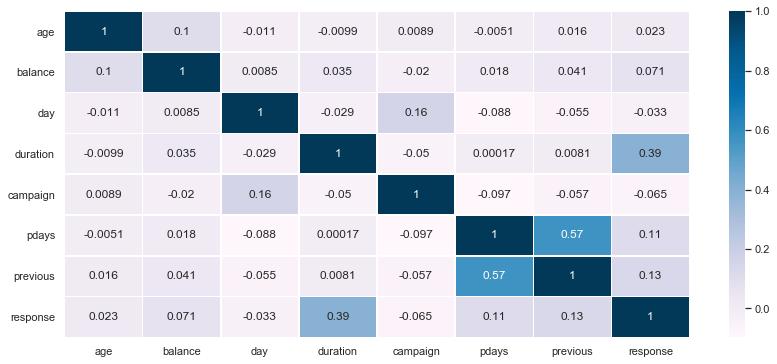

In [222]:
# Heatmap correlation for numerical ?
# Correlacionadas com y são importantes
# correlacioanadas entre si, retirar
corr = bank.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr, annot=True, linewidths=.5, cmap='PuBu')
# From this we have that the best  numerical variables for predict the costumer response is:
# Duration, previous
# as mais correlacionadas entre si são os índices socio

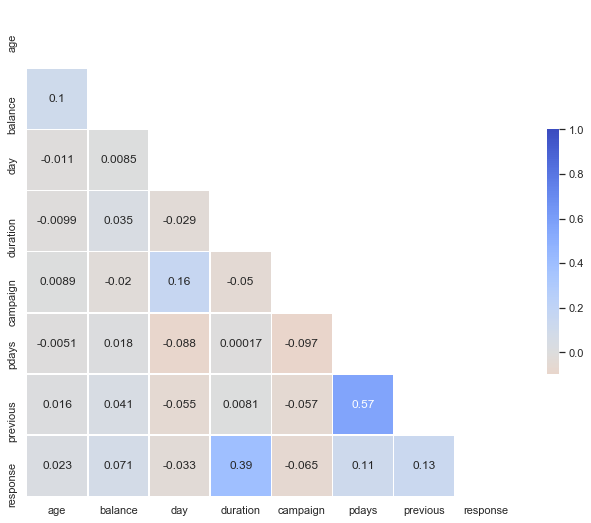

In [223]:
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
g = sns.heatmap(corr, annot = True, mask=mask, cmap='coolwarm_r', vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

g.figure.savefig('data/heatmap.png')

### Interpretation
 - variable among themselves:
 
 'campaign outcome' has a strong correlation with 'duration'

 'previous' and 'pdays' also show correlation


- variable x response:
 
  Clearly the variable 'duration' has the strongest correlation with the target variable 'response'

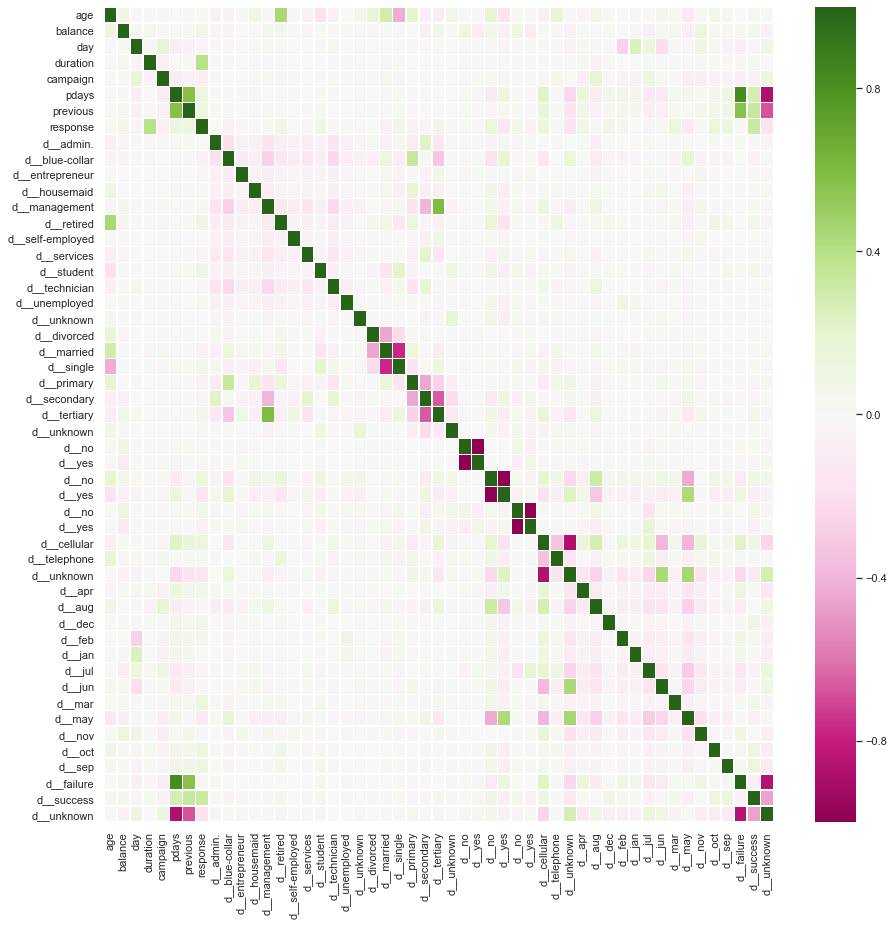

In [224]:
# Heatmap correlation for numerical ?
# Correlacionadas com y são importantes
# correlacioanadas entre si, retirar
correlation = dummies.corr()
correlation
plt.figure(figsize=(15,15))
sns.heatmap(correlation, linewidths=.5, cmap="PiYG")

In [225]:
# g = sns.pairplot(bank, vars=['age', 'duration', 'campaign', 'pdays', 'previous'], 
#                  hue="response", palette="husl")

# Relationship between call durations x number of calls by response

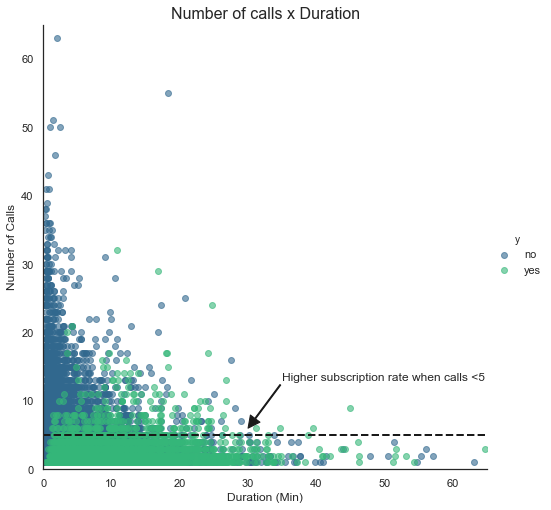

AttributeError: 'FacetGrid' object has no attribute 'figure'

In [226]:
# Plot data and regression model
g = sns.lmplot(x='duration', y='campaign',data = bank,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7, palette = 'viridis' )

# fixa pontos no axis
plt.axis([0,65,0,65])
# labels
plt.ylabel('Number of Calls')
plt.xlabel('Duration (Min)')
#title
plt.title('Number of calls x Duration', size=16)

# Annotation
# Refference line for number of calls < 5
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()


g.figure.savefig('data/duration.png')

### Interpretation

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

## Age Groups

In [227]:
lst = [bank]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [ ]:
bank.head()

# STATS
 - Association test between each variable and response
 - ANOVA between balance x education or job
 - Comparare models using balanced data x unbalanced
 - Comparare models using dummies x only numerical 

# Reducing dimensionality

In [229]:
# # Aplicar treshold para colunas exceto y
# variables = correlation[(correlation['response'] > 0.1) | (correlation['response'] < -0.1)]['response'].index.to_list()
# variables

# Não funcionou!!!!!!!

## Logistic Regression

### Learning the Logistic Regression Model
Available in: https://www.kaggle.com/faressayah/logistic-regression-tutorial-predict-ad-click

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. This is done using maximum-likelihood estimation.

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data (more on this when we talk about preparing your data).

The best coefficients would result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data (e.g. probability of 1 if the data is the primary class).

We are not going to go into the math of maximum likelihood. It is enough to say that a minimization algorithm is used to optimize the best values for the coefficients for your training data. This is often implemented in practice using efficient numerical optimization algorithm (like the Quasi-newton method).

When you are learning logistic, you can implement it yourself from scratch using the much simpler gradient descent algorithm.

### y
no     37245
yes     4980

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 

### Method 1

In [231]:
# Choose X and Y
x = dummies.drop(['response', 'y'], axis = 1, inplace=False)
y = dummies['response']
# Train and predict.
clf = LogisticRegression(random_state=0).fit(x, y)
y_pred = clf.predict(x)
# Print results.
print('Accuracy score:', accuracy_score(y, y_pred))
print('Cohen Kappa:', cohen_kappa_score(y, y_pred))
print('Confusion Matrix:', confusion_matrix(y, y_pred))

Accuracy score: 0.8892340292325844
Cohen Kappa: 0.18279870092331096
Confusion Matrix: [[36298   363]
 [ 4237   631]]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### # Method 2

In [232]:
#Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# describes info about train and test set 
# print("Number transactions X_train dataset: ", X_train.shape) 
# print("Number transactions y_train dataset: ", y_train.shape) 
# print("Number transactions X_test dataset: ", X_test.shape) 
# print("Number transactions y_test dataset: ", y_test.shape)
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10959
           1       0.61      0.23      0.33      1500

    accuracy                           0.89     12459
   macro avg       0.76      0.60      0.64     12459
weighted avg       0.87      0.89      0.87     12459



C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Unbalanced data

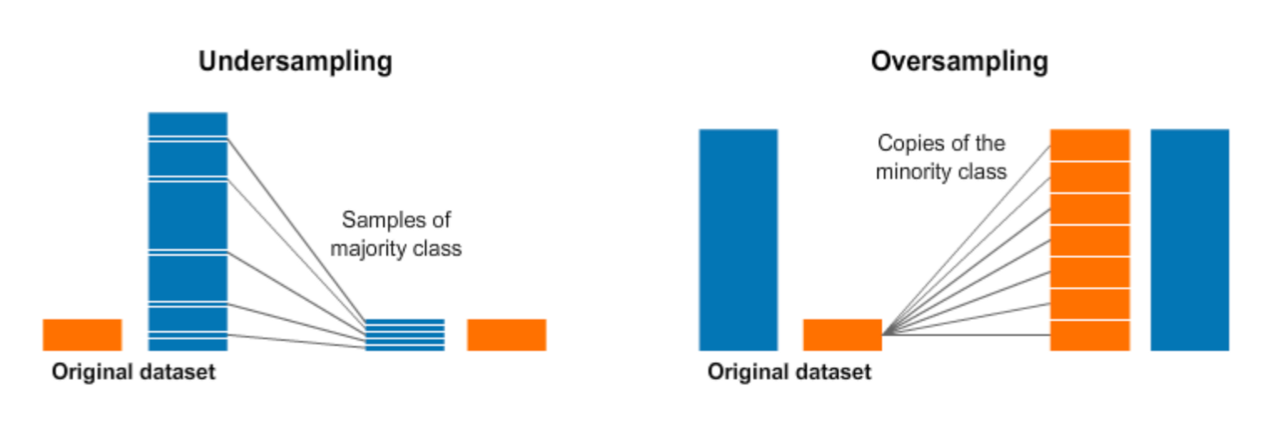

Class 0: 36661
Class 1: 4868
Proportion: 7.53 : 1


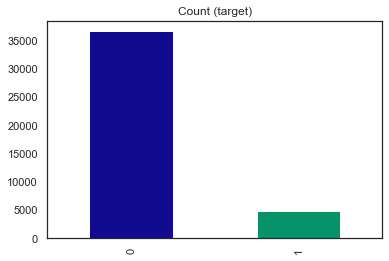

In [233]:
target_count = dummies.response.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)',color = ['#120a8f', '#06936a'])
plt.show()

#The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.

### Undersampling

Random under-sampling:
1    4868
0    4868
Name: response, dtype: int64


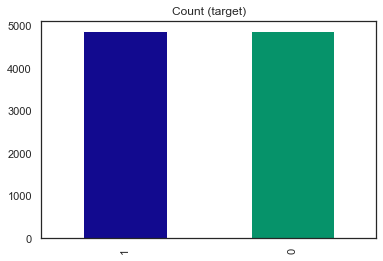

In [248]:
# CONTAR CLASSES
count_class_0, count_class_1 = dummies.response.value_counts()
# # Divide by class
df_class_0 = dummies[dummies['response'] == 0]
df_class_1 = dummies[dummies['response'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.response.value_counts())
df_test_under.response.value_counts().plot(kind='bar', title='Count (target)',color = ['#120a8f', '#06936a'])
plt.show()

In [249]:
# Choose X and Y
x = df_test_under.drop(['response', 'y'], axis = 1, inplace=False)
y = df_test_under['response']

#Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# describes info about train and test set 
# print("Number transactions X_train dataset: ", X_train.shape) 
# print("Number transactions y_train dataset: ", y_train.shape) 
# print("Number transactions X_test dataset: ", X_test.shape) 
# print("Number transactions y_test dataset: ", y_test.shape)
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1448
           1       0.81      0.80      0.80      1473

    accuracy                           0.80      2921
   macro avg       0.80      0.80      0.80      2921
weighted avg       0.80      0.80      0.80      2921



C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Interpretation
- Applying the same model on the df_test_under we notice a decrease in accuracy

M1 = 0.89
M2 = 0.79

### Oversampling

Random over-sampling:
1    36661
0    36661
Name: response, dtype: int64


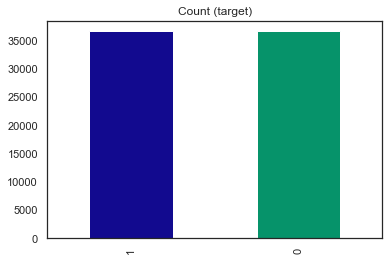

In [246]:
#EQUALIZANDO A BASE POR OVER SAMPLING
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.response.value_counts())

df_test_over.response.value_counts().plot(kind='bar', title='Count (target)', color = ['#120a8f', '#06936a'])
plt.show()

In [247]:
# Choose X and Y
x = df_test_over.drop(['response', 'y'], axis = 1, inplace=False)
y = df_test_over['response']

#Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# describes info about train and test set 
# print("Number transactions X_train dataset: ", X_train.shape) 
# print("Number transactions y_train dataset: ", y_train.shape) 
# print("Number transactions X_test dataset: ", X_test.shape) 
# print("Number transactions y_test dataset: ", y_test.shape)
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     10891
           1       0.81      0.79      0.80     11106

    accuracy                           0.80     21997
   macro avg       0.80      0.80      0.80     21997
weighted avg       0.80      0.80      0.80     21997



C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix, without normalization
[[8830 2061]
 [2358 8748]]
Normalized confusion matrix
[[0.81076118 0.18923882]
 [0.21231767 0.78768233]]


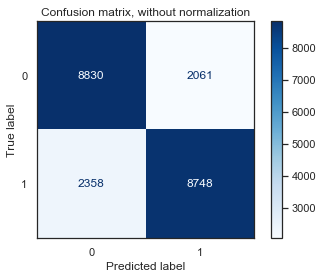

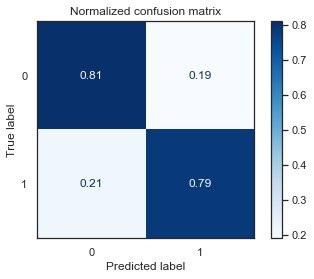

In [238]:
# # Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Interpretation
- Applying the same model on the df_test_over we notice a increase in accuracy
M1 = 0.89 M2 = 0.79 M3 = 0.80

# Concluding remarks

In [254]:
dummies['predicted'] = y_test
dummies.head()

,age,balance,day,duration,campaign,pdays,previous,y,response,d__admin.,d__blue-collar,d__entrepreneur,d__housemaid,d__management,d__retired,d__self-employed,d__services,d__student,d__technician,d__unemployed,d__unknown,d__divorced,d__married,d__single,d__primary,d__secondary,d__tertiary,d__unknown,d__no,d__yes,d__no,d__yes,d__no,d__yes,d__cellular,d__telephone,d__unknown,d__apr,d__aug,d__dec,d__feb,d__jan,d__jul,d__jun,d__mar,d__may,d__nov,d__oct,d__sep,d__failure,d__success,d__unknown,predicted
0,58.0,2143.0,5.0,4.35,1.0,-1.0,0.0,no,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,NaN
1,44.0,29.0,5.0,2.52,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,NaN
2,33.0,2.0,5.0,1.27,1.0,-1.0,0.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,NaN
3,47.0,1506.0,5.0,1.53,1.0,-1.0,0.0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,NaN
4,33.0,1.0,5.0,3.30,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,NaN


In [258]:
# POsitive results
positive = dummies[dummies['predicted'] == 1]
positive.head()

,age,balance,day,duration,campaign,pdays,previous,y,response,d__admin.,d__blue-collar,d__entrepreneur,d__housemaid,d__management,d__retired,d__self-employed,d__services,d__student,d__technician,d__unemployed,d__unknown,d__divorced,d__married,d__single,d__primary,d__secondary,d__tertiary,d__unknown,d__no,d__yes,d__no,d__yes,d__no,d__yes,d__cellular,d__telephone,d__unknown,d__apr,d__aug,d__dec,d__feb,d__jan,d__jul,d__jun,d__mar,d__may,d__nov,d__oct,d__sep,d__failure,d__success,d__unknown,predicted
129,55.0,2476.0,5.0,9.65,1.0,-1.0,0.0,yes,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0
168,54.0,184.0,5.0,11.22,2.0,-1.0,0.0,yes,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0
388,56.0,830.0,6.0,20.02,1.0,-1.0,0.0,yes,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0
1124,29.0,199.0,7.0,28.15,4.0,-1.0,0.0,yes,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0
1173,39.0,70.0,8.0,13.55,1.0,-1.0,0.0,yes,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0
